<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/notebooks/lognormal_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lognormal Demo

The lognormal distribution can be used to model all kinds of phenomena. What kinds of data are lognormally distributed?

*For all data, we will remove values equal to 0.

## Setup

In [ ]:
!pip install symbulate praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 12.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
import numpy as np
import time
import matplotlib.pyplot as plt
import praw
from symbulate import *
from scipy.stats import shapiro, probplot

In [ ]:
url = "https://mshsu.github.io/probasets/data/"

## Stack Overflow Comment Length

The length of internet comments tends to follow a lognormal distribution. Stack Overflow is a good example of this. More information about the data [here](https://cloud.google.com/blog/topics/public-datasets/google-bigquery-public-datasets-now-include-stack-overflow-q-a).

In [ ]:
stacko = pd.read_csv(url + "StackOverflow.csv")
stacko

,id,text,creation_date,post_id,user_id,user_display_name,score
0,1985362,"`return memcmp(a, b, 4) < 0;`",2010-01-13 15:16:02.610000 UTC,2057610,NaN,Roger Pate,18
1,1992048,"ok - thanks, that helped. i could easily contr...",2010-01-14 11:12:43.377000 UTC,2063271,NaN,user250608,6
2,1993240,"In fact, C++ does this with the specialised co...",2010-01-14 14:23:44.740000 UTC,2064645,NaN,anon,9
3,1993904,None. And they are not function pointers.,2010-01-14 15:38:19.520000 UTC,2065232,NaN,anon,9
4,1995764,It's undefined because the C++ Standard says i...,2010-01-14 19:13:56.650000 UTC,2065961,NaN,anon,6
...,...,...,...,...,...,...,...
995,2021162,"Awesome, i got you, but how do i define these ...",2010-01-18 20:17:03.060000 UTC,2087739,NaN,user222427,0
996,2021181,"@GMan: Right, platform-specific and you can st...",2010-01-18 20:18:33.317000 UTC,2088562,NaN,Roger Pate,0
997,2021186,"My suspicion, which you'll be able to confirm ...",2010-01-18 20:19:01.570000 UTC,2087500,NaN,user8599,0
998,2021199,@roy do I have to make another private static ...,2010-01-18 20:20:12.037000 UTC,2087739,NaN,user222427,0


### Distribution of Comment Length

In [ ]:
stacko_transf = np.log(stacko['text'].str.len())
stacko_mean = stacko_transf.mean()
stacko_sd = stacko_transf.std()

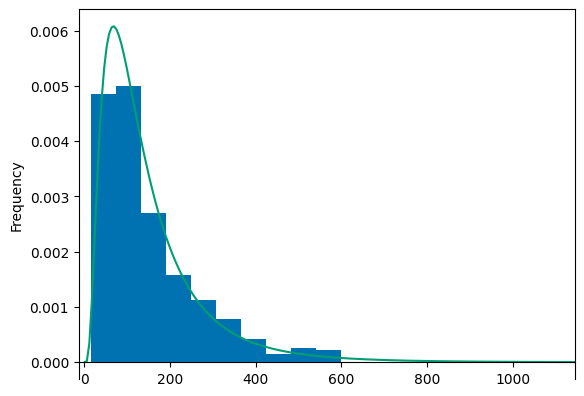

In [ ]:
stacko['text'].str.len().plot.hist(density=True)
LogNormal(stacko_mean, stacko_sd).plot()

### Distribution of log(Comment Length)

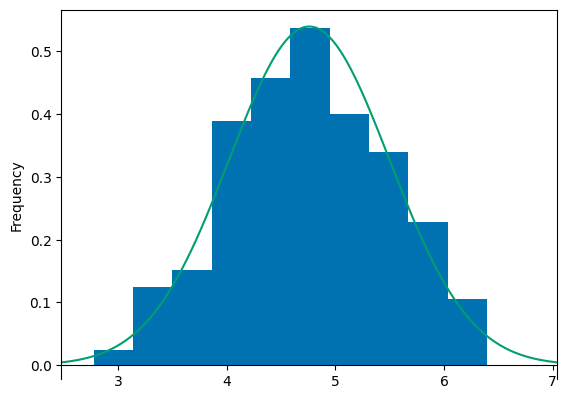

In [ ]:
stacko_transf.plot.hist(density=True)
Normal(stacko_mean, stacko_sd).plot()

### QQ Plot

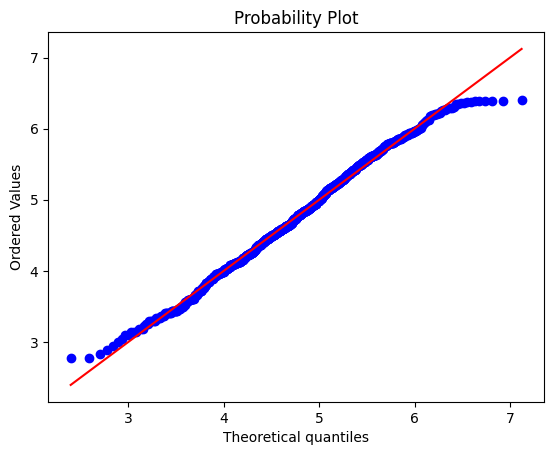

In [ ]:
qq = probplot(stacko_transf, dist="norm", 
              sparams=(stacko_mean, stacko_sd), 
              plot=plt)
plt.show()

## Reddit Comments

Here is another example of comments following a rough LogNormal distribution. The data were scraped using the [PRAW API](https://praw.readthedocs.io/en/stable/index.html)

Code based off of this [tutorial](https://towardsdatascience.com/scrape-reddit-data-using-python-and-google-bigquery-44180b579892) by Akhilesh Narapareddy on *Towards Data Science*.

In [ ]:
pwdfileName = '../account.info'
pwdfile = open(pwdfileName, 'r')

contents = pwdfile.read().splitlines()

c_id, c_s, u, p = contents

In [ ]:
reddit = praw.Reddit(user_agent='Comment Extraction (by /u/BootsNC4ts)',
                     client_id=c_id,
                     client_secret=c_s,
                     username=u,
                     password=p,
                     check_for_async=False)

In [ ]:
comm_list = []
header_list = []
i = 0
for submission in reddit.subreddit('calpoly').top(time_filter="all", limit=50):
    submission.comments.replace_more(limit=None)
    comment_queue = submission.comments[:]  # Seed with top-level
    while comment_queue:
        header_list.append(submission.title)
        comment = comment_queue.pop(0)
        comm_list.append(comment.body)
        t = []
        t.extend(comment.replies)
        while t:
            header_list.append(submission.title)
            reply = t.pop(0)
            comm_list.append(reply.body)
redd = pd.DataFrame(header_list)
redd['comm_list'] = comm_list
redd.columns = ['header','comments']
redd['comments'] = redd['comments'].apply(lambda x : x.replace('\n',''))

redd

,header,comments
0,Shoutout to best WoW group and friends from Ro...,This might be the best thing I’ve ever seen on...
1,Shoutout to best WoW group and friends from Ro...,I hope they are engineering students!
2,Shoutout to best WoW group and friends from Ro...,That is absolutely fucking sick. Good group if...
3,Shoutout to best WoW group and friends from Ro...,That’s awesome! What a kind group you have.
4,Shoutout to best WoW group and friends from Ro...,"So cool to see, I picked up these tiles with A..."
...,...,...
708,Any Canvas email scares me now,"Literally worked 9 hours today, same yesterday..."
709,Any Canvas email scares me now,Good to hear someone else is in my exact same ...
710,Any Canvas email scares me now,I live in pain
711,Any Canvas email scares me now,"Pain. Agony, even"


In [ ]:
redd_transf = np.log(redd['comments'].str.len())
redd_mean = redd_transf.mean()
redd_sd = redd_transf.std()

### Distribution of Comment Length

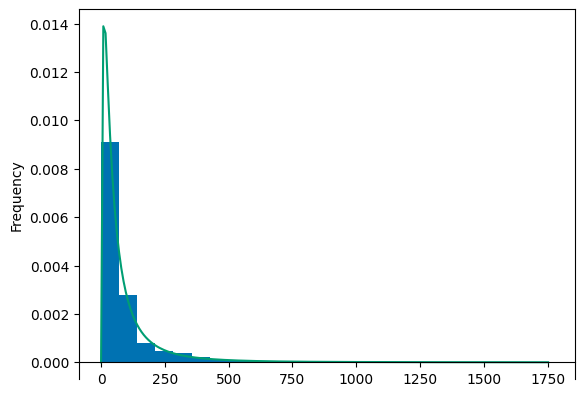

In [ ]:
redd['comments'].str.len().plot.hist(density=True, bins=25)
LogNormal(redd_mean, redd_sd).plot()

### Distribution of log(Comment Length)

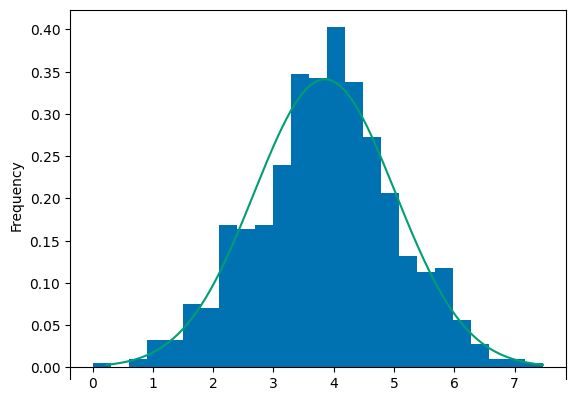

In [ ]:
redd_transf.plot.hist(density=True, bins=25)
Normal(redd_mean, redd_sd).plot()

### QQ Plot

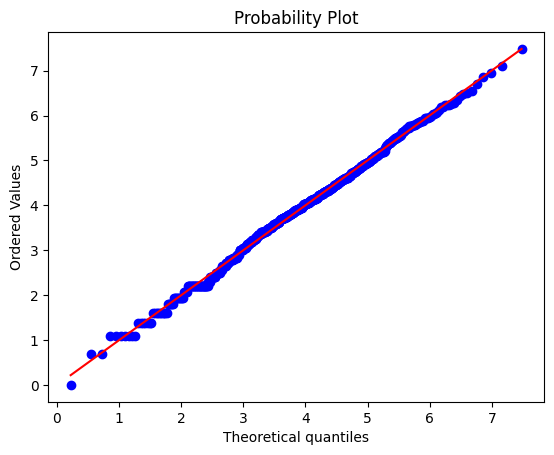

In [ ]:
qq = probplot(redd_transf, dist="norm", 
              sparams=(redd_mean, redd_sd), 
              plot=plt)
plt.show()

## US Cities Population

US City populations appear to be lognormally distributed as well. (Because the distribution of city populations is so heavily right skew, the untransformed distribution is not shown.) More information about the data [here](https://simplemaps.com/data/us-cities).

In [ ]:
cities = pd.read_csv(url + "Cities.csv")
cities = cities[cities['population'] > 0]
cities

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30378,Lupton,Lupton,AZ,Arizona,4001,Apache,35.3547,-109.0527,1,24.5,shape,False,False,America/Denver,3,86508,1840022623
30379,Goldcreek,Goldcreek,MT,Montana,30077,Powell,46.5838,-112.9284,1,1.9,shape,False,False,America/Denver,3,59733,1840032724
30380,The Ranch,The Ranch,MN,Minnesota,27087,Mahnomen,47.3198,-95.6952,1,11.4,shape,False,True,America/Chicago,4,56557,1840039629
30381,Stotesbury,Stotesbury,MO,Missouri,29217,Vernon,37.9744,-94.5645,1,25.2,shape,False,True,America/Chicago,3,64752,1840010843


In [ ]:
cities_transf = np.log(cities['population'])
cities_mean = cities_transf.mean()
cities_sd = cities_transf.std()

### Distribution of log(City Population)

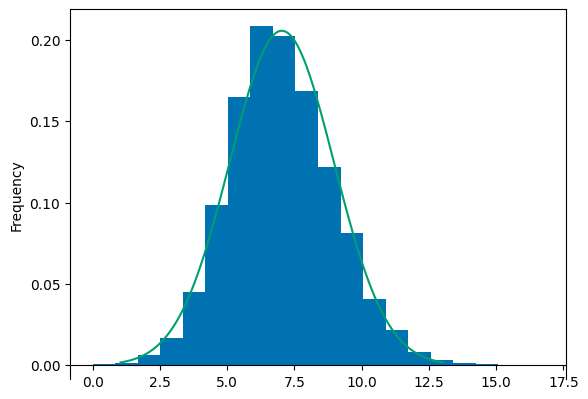

In [ ]:
cities_transf.plot.hist(density=True, bins=20)
Normal(cities_mean, cities_sd).plot()

### QQ Plot

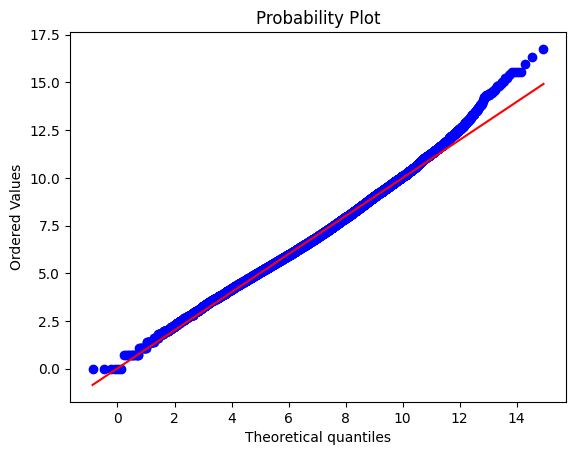

In [ ]:
qq = probplot(cities_transf, dist="norm", 
              sparams=(cities_mean, cities_sd), plot=plt)
plt.show()

## COVID Hospital Utilization

The Center for Medicare and Medicaid (CMS) keeps weekly data on nursing homes that treat COVID. From this data, we can find that many variables regarding hospital utilization appear to follow a lognormal distribution, including:
- Weekly Number of Occupied Beds per Hospital
- Total Resident COVID Deaths per Hospital

More information about the data [here](https://data.cms.gov/covid-19/covid-19-nursing-home-data). The data have been subset down to a single week, with hospitals only from New York.

In [ ]:
hosp = pd.read_csv(url + "COVIDHospitals.csv")
hosp

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Eligible to Work in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,3/7/2021,335864,FLUSHING HOSPITAL MEDICAL CENTER T C U,45TH AVENUE AND PARSONS BOULEVARD,FLUSHING,NY,11355,7182066595,Queens,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/7/2021,335856,JAMAICA HOSPITAL MEDICAL CENTER T C U,8900 VAN WYCK EXPRESSWAY,JAMAICA,NY,11418,7182066595,Queens,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/7/2021,335869,NORTHERN WESTCHESTER HOSPITAL T C U,400 EAST MAIN STREET,MOUNT KISCO,NY,10549,9146668306,Westchester,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/7/2021,335853,JOHN T MATHER MEMORIAL HOSP T C U,75 NORTH COUNTRY ROAD,PORT JEFFERSON,NY,11777,6314731320,Suffolk,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/7/2021,335862,NEW YORK-PRESBYTERIAN / QUEENS T C U,56-45 MAIN STREET,FLUSHING,NY,11355,9999999991,Queens,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3/7/2021,335091,FULTON CENTER FOR REHABILITATION AND HEALTHCARE,847 COUNTY HIGHWAY 122,GLOVERSVILLE,NY,12078,5187733400,Fulton,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,3/7/2021,335188,NEW PALTZ CENTER FOR REHABILITATION AND NURSING,1 JANSEN ROAD,NEW PALTZ,NY,12561,8452550830,Ulster,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,3/7/2021,335374,THE PINES AT UTICA CENTER FOR NURSING AND REHAB,1800 BUTTERFIELD AVE,UTICA,NY,13501,3157973570,Oneida,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,3/7/2021,335380,NORTHERN METROPOLITAN RES HEALTH CARE FACILITY...,225 MAPLE AVENUE,MONSEY,NY,10952,8453529000,Rockland,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution of Number of Occupied Beds, for NY Nursing Facilities the Week Ending 3/7/2021

In [ ]:
beds = hosp[hosp['Total Number of Occupied Beds'] > 0]['Total Number of Occupied Beds']
beds_transf = np.log(beds)
beds_mean = beds_transf.mean()
beds_sd = beds_transf.std()

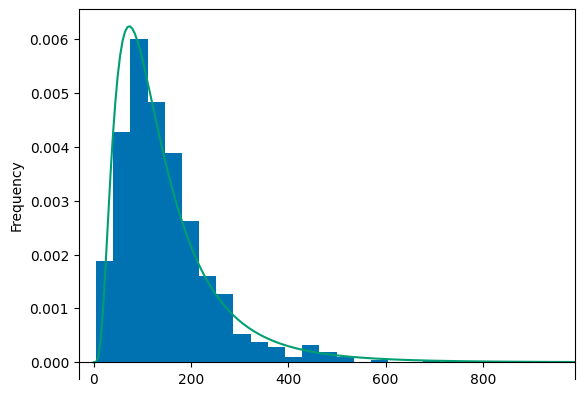

In [ ]:
beds.plot.hist(density=True, bins=20)
LogNormal(beds_mean, beds_sd).plot()

### Distribution of log(Number of Occupied Beds), for for NY Nursing Facilities the Week Ending 3/7/2021

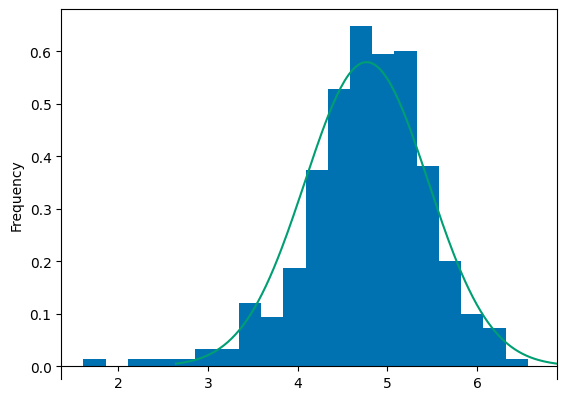

In [ ]:
beds_transf.plot.hist(density=True, bins=20)
Normal(beds_mean, beds_sd).plot()

### QQ Plot

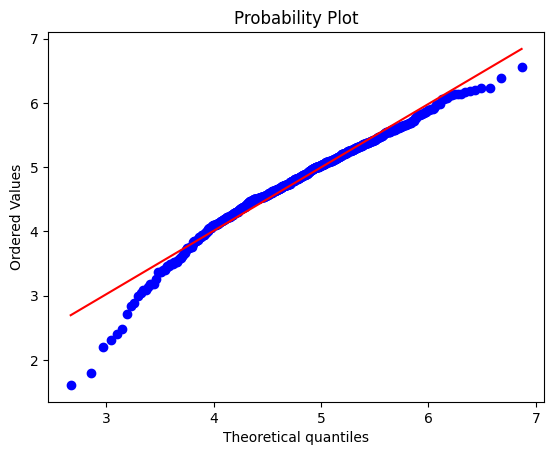

In [ ]:
qq = probplot(beds_transf, dist="norm", 
              sparams=(beds_mean, beds_sd), plot=plt)
plt.show()

### Distribution of Residents Total Deaths, for for NY Nursing Facilities the Week Ending 3/7/2021

In [ ]:
deaths = hosp['Residents Total All Deaths'][hosp['Residents Total All Deaths'] > 0]
deaths_transf = np.log(deaths)
deaths_mean = deaths_transf.mean()
deaths_sd = deaths_transf.std()

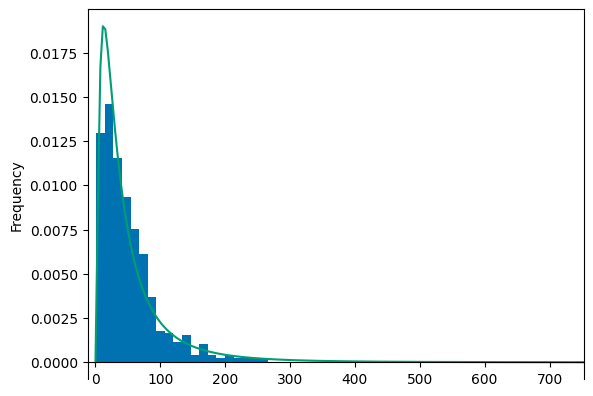

In [ ]:
deaths.plot.hist(density=True, bins=20)
LogNormal(deaths_mean, deaths_sd).plot()

### Distribution of log(Residents Total Deaths), for for NY Nursing Facilities the Week Ending 3/7/2021

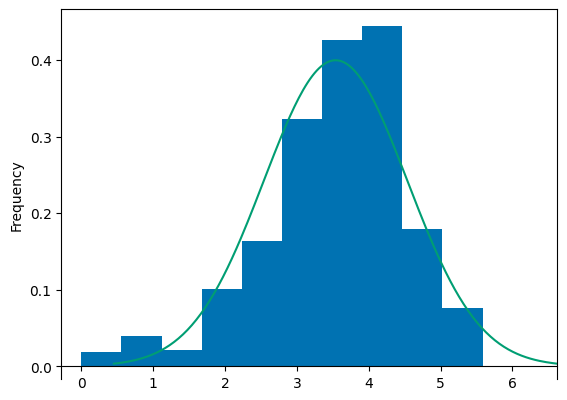

In [ ]:
deaths_transf.plot.hist(density=True)
Normal(deaths_mean, deaths_sd).plot()

### QQ Plot

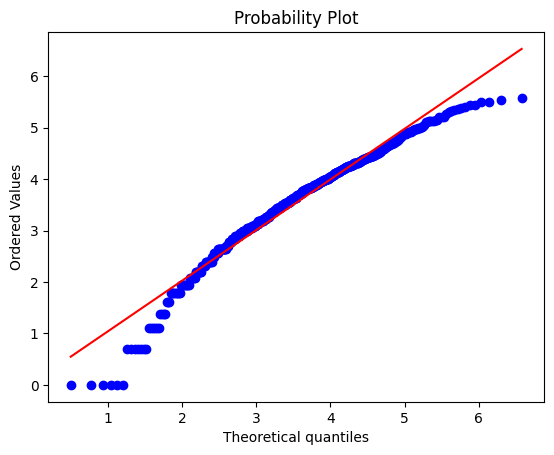

In [ ]:
qq = probplot(deaths_transf, dist="norm", 
              sparams=(deaths_mean, deaths_sd), plot=plt)
plt.show()